# Вспомогательный код

In [ ]:
import random
import numpy as np


def set_seed():
    random.seed(42)
    np.random.seed(42)

# Задание 1. Множественная линейная регрессия

Почти все проблемы реального мира, с которыми вы столкнетесь, будут иметь более двух переменных. Линейная регрессия с участием нескольких переменных называется **«множественной линейной регрессией» (Multiple Linear Regression)**.

Уравнение множественной линейной регрессии имеет вид:

$y = b_0 + b_1 * x_1 + b_2 * x_2 + ... + b_n * x_n$

Отличие между простой и множественной линейной регрессией заключается в том, что вместо линии регрессии в ней используется гиперплоскость.

В этом задании мы будем использовать множественную линейную регрессию для прогнозирования потребления газа (в миллионах галлонов) в 48 штатах США на основе: налогов на газ (в центах), дохода на душу населения (в долларах), шоссе с твердым покрытием (в милях) и доли населения, имеющего водительские права.

Задание:

1. Разделить датасет на тренировочную и тестовую части в соотношении 4 к 1 (`random_state=42`)
1. Провести нормализацию/стандартизацию данных одним из рассмотренных на лекции способов
1. Реализовать множественную линейную регрессию с помощью sklearn
1. Обучить модель
1. Вывести сравнительную таблицу y_test и y_pred
1. Выведите параметры качества модели:
  - Mean Absolute Error
  - Mean Squared Error
  - Root Mean Squared Error

Импорт необходимых библиотек:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Загрузка датасета:

In [ ]:
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/petrol_consumption.csv

!wget доступен в colab, но недоступен через локальный jupyter.

В локальном случае требуется [скачать](https://www.kaggle.com/code/kerneler/starter-petrol-consumption-2d0bf1e7-0/input) petrol_consumption.csv самостоятельно.

In [ ]:
dataset = pd.read_csv("/content/petrol_consumption.csv")
print(dataset.shape)
dataset.head()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
x = dataset[
    ["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]
]
y = dataset["Petrol_Consumption"]

In [ ]:
set_seed()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

In [ ]:
# Normalization нормализацию нужно делать по трейновой части. Фит трансформ по трейну, по тесту только трансформ
# Your code here
x_train_norm = scaler.fit_transform(x_train)  # scaled data
scaler.mean_

array([7.63368421e+00, 4.31752632e+03, 5.80618421e+03, 5.76657895e-01])

In [ ]:
x_test_norm = scaler.transform(x_test)

In [ ]:
# Multiple regression
# Your code here
regressor = LinearRegression()
regressor.fit(x_train_norm, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test_norm)

In [ ]:
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [ ]:
# Metrics
# Your code here
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def print_metrics(y_true, y_predicted):
    print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.3f}")
    print(
        "Root mean squared error: ",
        f"{mean_squared_error(y_test, y_pred, squared=False):.3f}",
    )
    print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.3f}")
    print(f"R2 score: {r2_score(y_test, y_pred):.3f}")


print_metrics(y_test, y_pred)

Mean squared error: 4666.345
Root mean squared error:  68.311
Mean absolute error: 56.822
R2 score: 0.204


## Формат результата

Вывод метрик качества:

* Mean Absolute Error ~ 60
* Mean Squared Error: ~ 4700
* Root Mean Squared Error: ~ 70

# Задание 2. Kernel SVM

В этом задании вы будете применять обобщенную линейную модель Kernel SVM, для решения нелинейной задачи.  

Для этого задания мы сгенерируем датасет, представляющий собой **две закрученные спирали**, относящиеся к разным классам. Для этого воспользуемся кодом из [источника](https://glowingpython.blogspot.com/2017/04/solving-two-spirals-problem-with-keras.html). Такие данные могут вызвать проблемы не только у линейной модели, но и у маленькой нейронной сети.

Импорт необходимых библиотек:

In [ ]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Генерация датасета:

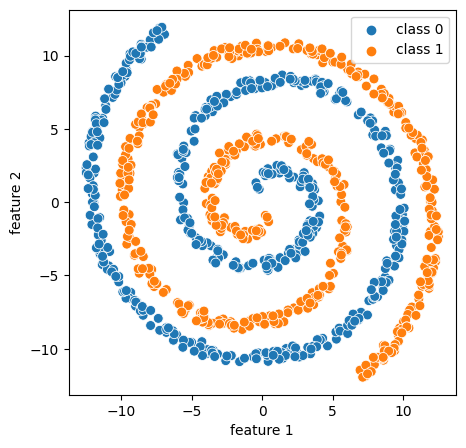

In [ ]:
set_seed()


def twospirals(n_points, noise=0.8):
    """
    Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return (
        np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
        np.hstack((np.zeros(n_points), np.ones(n_points))),
    )


x, y = twospirals(500)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=50, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["class 0", "class 1"])
ax.set(xlabel="feature 1", ylabel="feature 2")
plt.show()

Разделите датасет на **тренировочную и тестовую части** в соотношении 4 к 1 (`random_state=42`):

In [ ]:
set_seed()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Your code here

**Нормализуйте признаки** (подсказка: не “подглядывайте” в test):


In [ ]:
# Your code here
x_train_norm = scaler.fit_transform(x_train)

In [ ]:
x_test_norm = scaler.transform(x_test)

Попробуйте применить различные ядра для `svm.SVC`. Постройте **разделяющие кривые для train** части датасета. Посчитайте значения метрики **accuracy для test** части датасета.

In [ ]:
def plot_svm(x, y, clf):
    dull_cmap = ListedColormap(["#B8E1EC", "#FEE7D0"])
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        response_method="predict",
        cmap=dull_cmap,
        alpha=0.8,
        xlabel="feature 1",
        ylabel="feature 2",
        ax=ax,
    )

    sns.scatterplot(
        x=x[:, 0],
        y=x[:, 1],
        hue=y,
        s=50,
        ax=ax,
        palette=sns.color_palette(["#2DA9E1", "#F9B041"]),
    )
    plt.show()

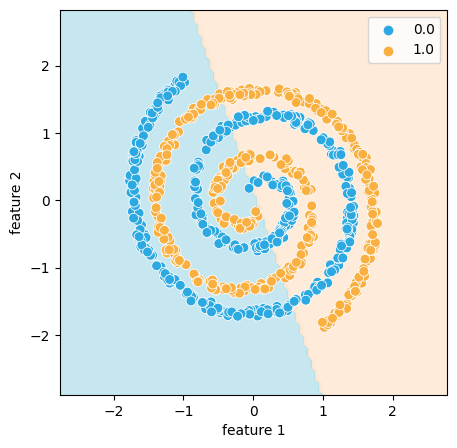

Mean squared error: 0.430
Root mean squared error:  0.656
Mean absolute error: 0.430
R2 score: -0.723
Accuracy: 56.99999999999999%


In [ ]:
# Your code here
clf = svm.SVC(kernel="linear")
clf.fit(x_train_norm, y_train)
plot_svm(x_train_norm, y_train, clf)
y_pred = clf.predict(x_test_norm)
print_metrics(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", f"{accuracy*100}%")# Your code here

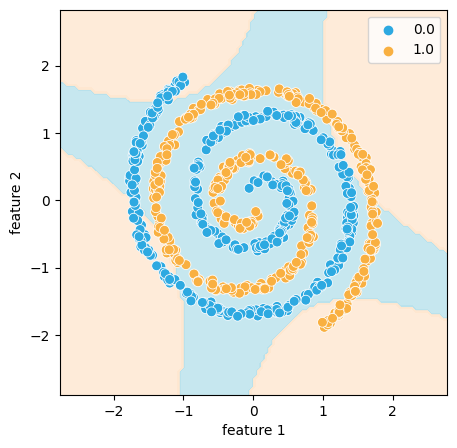

Mean squared error: 0.530
Root mean squared error:  0.728
Mean absolute error: 0.530
R2 score: -1.123
Accuracy: 47.0%


In [ ]:
clf = svm.SVC(kernel="poly", degree=4)
clf.fit(x_train_norm, y_train)
plot_svm(x_train_norm, y_train, clf)
y_pred = clf.predict(x_test_norm)
print_metrics(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", f"{accuracy*100}%")# Your code here

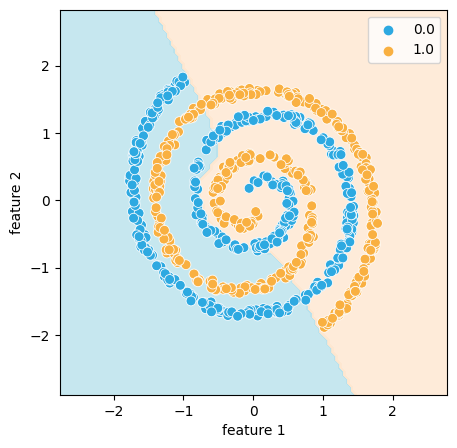

Mean squared error: 0.390
Root mean squared error:  0.624
Mean absolute error: 0.390
R2 score: -0.563
Accuracy: 61.0%


In [ ]:
clf = svm.SVC(kernel="poly", degree=5)
clf.fit(x_train_norm, y_train)
plot_svm(x_train_norm, y_train, clf)
y_pred = clf.predict(x_test_norm)
print_metrics(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", f"{accuracy*100}%")# Your code here

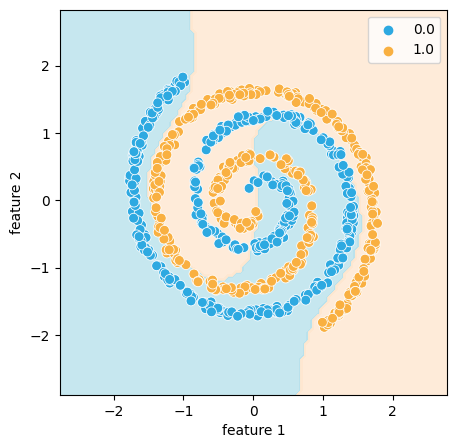

Mean squared error: 0.285
Root mean squared error:  0.534
Mean absolute error: 0.285
R2 score: -0.142
Accuracy: 71.5%


In [ ]:
clf = svm.SVC(kernel="rbf")
clf.fit(x_train_norm, y_train)
plot_svm(x_train_norm, y_train, clf)
y_pred = clf.predict(x_test_norm)
print_metrics(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", f"{accuracy*100}%")# Your code here

Ядра со значениями по умолчанию не позволяют качественно разделить классы. Для решения задачи необходимо изменить параметры ядра.

Выберете ядро, которое дает **наилучшее значение accuracy**, ознакомьтесь со **списком настраиваемых параметров** этого ядра в документации [`sklearn`](https://scikit-learn.org/stable/modules/svm.html#kernel-functions), **подберите гиперпараметры модели**. Для подбора гиперпараметров модели воспользуйтесь кросс-валидацией (`cross_val_score`). Пример подбора параметров можно найти в [документации](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_digits.html#sphx-glr-auto-examples-exercises-plot-cv-digits-py).Также можно использовать [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) или [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). Используйте разбиение на 4 фолда и `accuracy` в качестве целевой метрики.

Подсказка: при очень больших значения обратного коэффициента нормализации модель может плохо сходиться. Ограничьтесь максимальным значением  $10^5$.

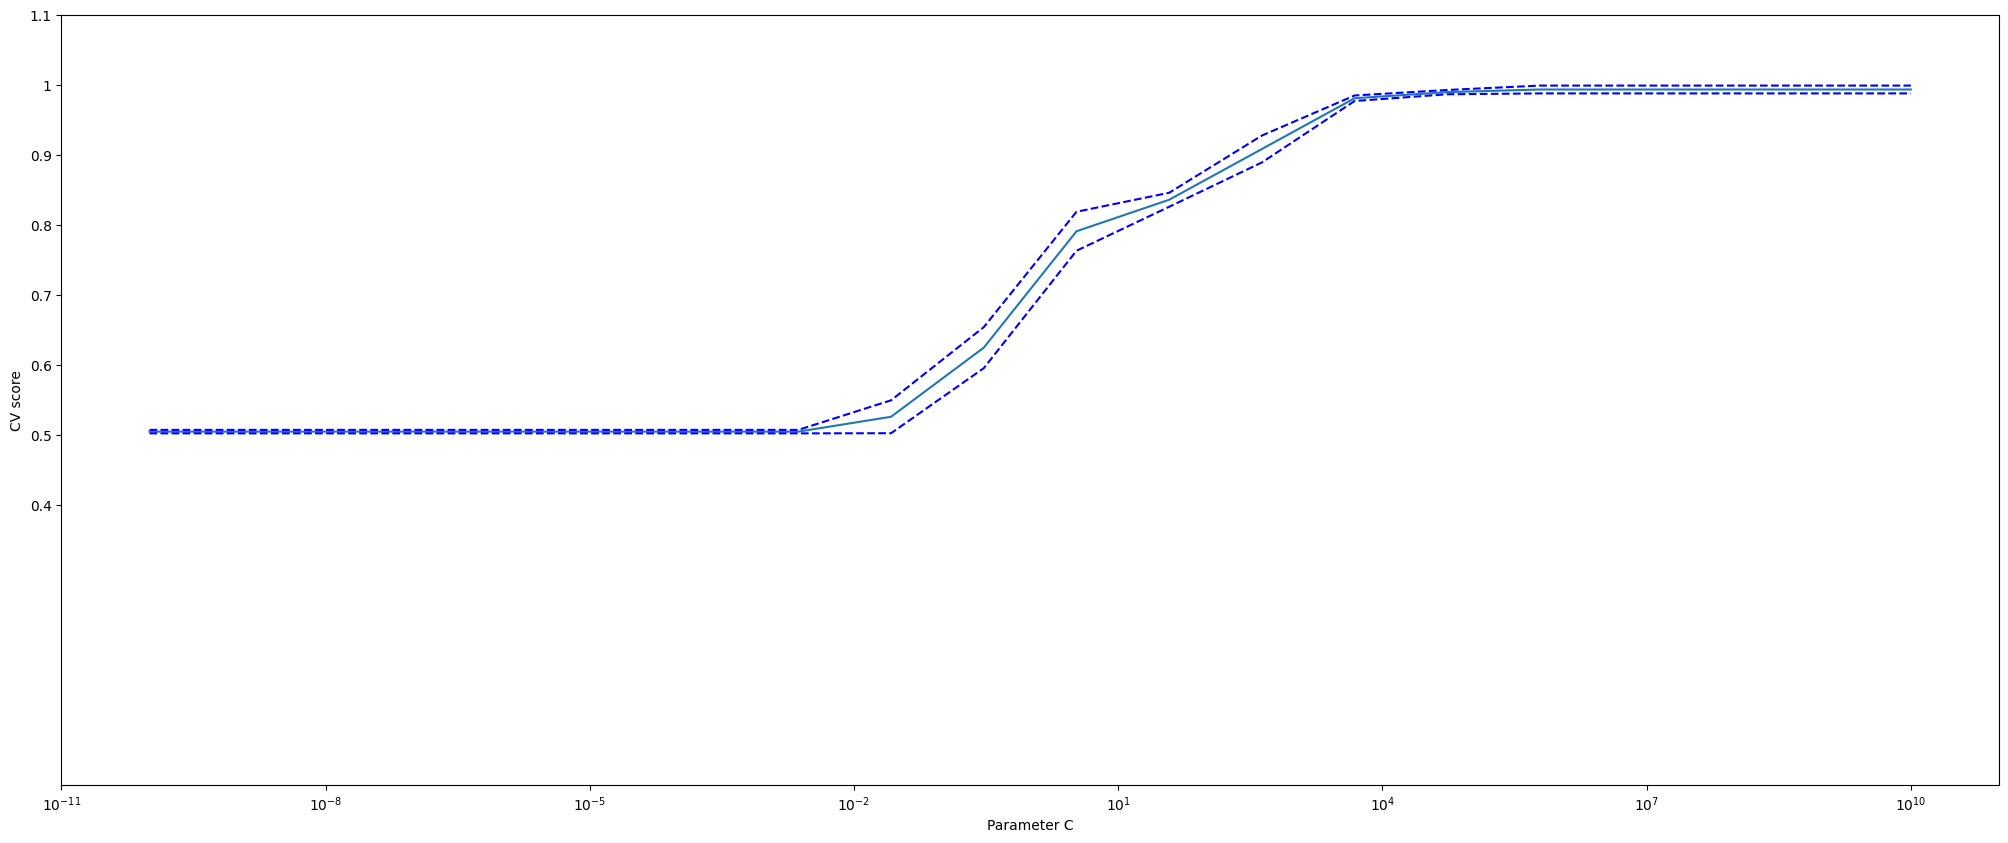

In [ ]:
import numpy as np

from sklearn import datasets, svm
from sklearn.model_selection import cross_val_score

X, y = x_train_norm, y_train

svc = svm.SVC(kernel="rbf")
C_s = np.logspace(-10, 10, 20)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt

plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), "b--")
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), "b--")
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel("CV score")
plt.xlabel("Parameter C")
plt.ylim(0, 1.1)
plt.show()

Обучите модель с подобранными гиперпараметрами. Постройте разделяющую кривую для train части датасета и значение accuracy для test.

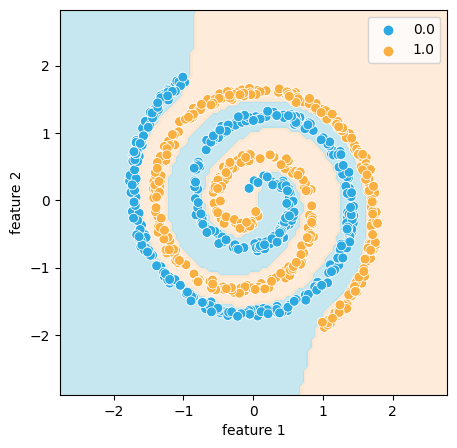

Mean squared error: 0.025
Root mean squared error:  0.158
Mean absolute error: 0.025
R2 score: 0.900
Accuracy: 97.5%


In [ ]:
# Your code here
clf = svm.SVC(kernel="rbf", C=10000)
clf.fit(x_train_norm, y_train)
plot_svm(x_train_norm, y_train, clf)
y_pred = clf.predict(x_test_norm)
print_metrics(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", f"{accuracy*100}%")# Your code here

## Формат результата

* Значение accuracy для test части датасета >0.95.
* График разделяющей кривой для train части датасета.

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX02/result_2_task_ex02.png" width="500">

# Задание 3. Модель классификатора

В этом задании нужно написать линейный классификатор и обучить его на датасете CIFAR-10.

Импорт необходимых библиотек:

In [ ]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from collections import defaultdict
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

Для оценки прогресса обучения мы будем использовать следующий код для визуализации:

In [ ]:
class ProgressPlotter:
    def __init__(self) -> None:
        self._history_dict = defaultdict(list)

    def add_scalar(self, tag: str, value) -> None:
        self._history_dict[tag].append(value)

    def display_plot(self) -> None:
        clear_output()
        n_keys = len(self._history_dict)
        fig, ax = plt.subplots(n_keys, 1, figsize=(12, 3 * n_keys))
        for key_idx, key in enumerate(self._history_dict.keys()):
            history_len = len(self._history_dict[key])
            if n_keys == 1:
                ax.plot(self._history_dict[key], color="c", marker="X")
                ax.set_ylabel(key)
                ax.set_xlabel("step")
                ax.set_xticks(np.arange(history_len))
                ax.set_xticklabels(np.arange(history_len))
            elif n_keys > 1:
                ax[key_idx].plot(self._history_dict[key], color="c", marker="X")
                ax[key_idx].set_ylabel(key)
                ax[key_idx].set_xlabel("step")
                ax[key_idx].set_xticks(np.arange(history_len))
                ax[key_idx].set_xticklabels(np.arange(history_len))
        fig.tight_layout()
        plt.show()

Вам не обязательно подробно разбираться с этим кодом, но для отладки (чтобы вы могли понять, как он работает, какие переменные в каком формате поступают на вход и т.д.) приводим пример работы:

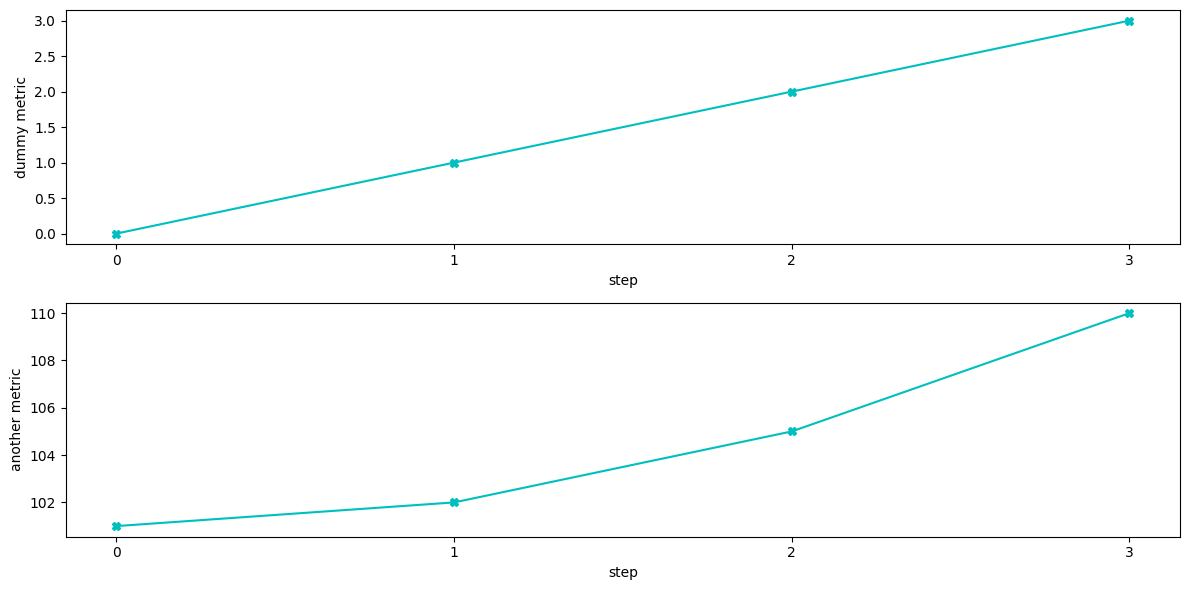

In [ ]:
pp = ProgressPlotter()

for i in range(4):
    pp.add_scalar(tag="dummy metric", value=i)
    pp.add_scalar(tag="another metric", value=i**2 + 101)
    pp.display_plot()

## Скачивание датасета CIFAR-10

### Стандартный способ

In [ ]:
train_dataset = datasets.CIFAR10("content", train=True, download=True)
test_dataset = datasets.CIFAR10("content", train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
x_train = np.array(train_dataset.data)
x_test = np.array(test_dataset.data)

y_train = np.array(train_dataset.targets)
y_test = np.array(test_dataset.targets)

# flatten
x_train = x_train.transpose(0, 3, 2, 1).reshape(x_train.shape[0], -1)
x_test = x_test.transpose(0, 3, 2, 1).reshape(x_test.shape[0], -1)

labels = [
    "Airplane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]


def to_img(arr):
    # Transform data from vector to array with 3 channel(RGB)
    img = (arr * 255).reshape(32, 32, 3).astype(int)
    return img


# display data(shape [..., 3072])
print("labels: ", labels)
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

labels:  ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


### Способ через colab

В этом разделе код для скачивания нестандартного датасета, который покажет, как загружать датасеты в colab.


In [ ]:
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !wget https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/cifar-10-python.tar.gz
    !tar -xzf cifar-10-python.tar.gz
    !ls -l
    top_path = "/content"
else:
    top_path = ""
    print("You didn't run code in colab")

--2023-10-18 16:56:34--  https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/cifar-10-python.tar.gz
Resolving edunet.kea.su (edunet.kea.su)... 89.175.15.242
Connecting to edunet.kea.su (edunet.kea.su)|89.175.15.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/octet-stream]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  4.39MB/s    in 60s     

2023-10-18 16:57:35 (2.73 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

total 166520
drwxr-xr-x 2 2156 1103      4096 Jun  4  2009 cifar-10-batches-py
-rw-r--r-- 1 root root 170498071 Jul 27 14:20 cifar-10-python.tar.gz
drwxr-xr-x 3 root root      4096 Oct 18 16:56 content
-rw-r--r-- 1 root root      1389 Jul 27 14:20 petrol_consumption.csv
drwxr-xr-x 1 root root      4096 Oct 17 13:25 sample_data


Распакуем данные

In [ ]:
# Recreating python object from the bytecode of the batches
def unpickle(file, encoding="bytes"):
    import pickle

    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding=encoding)
    return dict


def load_train_data():
    x_train = []
    y_train = []
    for i in range(1, 6):
        raw = unpickle(f"cifar-10-batches-py/data_batch_{i}")
        x_train.append(raw[b"data"])
        y_train.append(raw[b"labels"])
    x_train = np.vstack(x_train)
    y_train = np.hstack(y_train)
    return x_train, y_train


x_train, y_train = load_train_data()

#  load test data
test = unpickle(top_path + "/cifar-10-batches-py/test_batch")
x_test = np.array(test[b"data"])
y_test = np.array(test[b"labels"])

# load classes names
meta = unpickle(top_path + "/cifar-10-batches-py/batches.meta", "utf-8")
labels = meta["label_names"]


def to_img(arr):
    # Transform data from vector to array with 3 channel(RGB)
    img = arr.reshape(3, 32, 32).transpose(1, 2, 0).astype(int)
    return img


# display data(shape [..., 3072])
print("labels: ", labels)
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

labels:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


### Локальный способ

Эта инструкция нужна, если вы запускаете блокнот локально:
1. Скачайте архив с датасетом CIFAR-10 с оффициального
[сайта](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz). И не удаляйте его в течение курса, он ещё не раз пригодится.
2. Распакуйте архив в папку с заданием.
3. Проверьте, в какой директории запущен блокнот, командой `cd`.
4. Если директория не та, в которой лежат файлы датасета, смените её с помощью `cd C:\some\directory\with\dataset`.
5. Проверьте командой `ls`, видит ли блокнот файлы датасета.

## Просмотр данных

Отобразим данные графически:

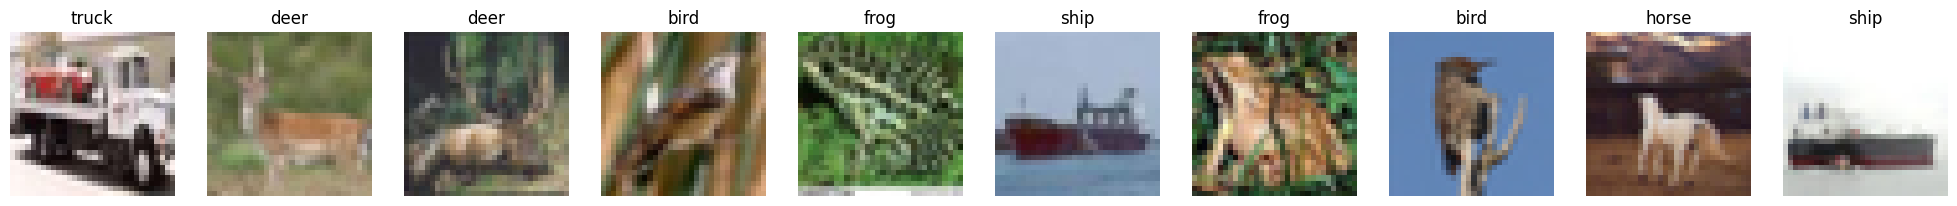

In [ ]:
def to_img(arr):
    # Transform data from vector to array with 3 channel(RGB)
    img = arr.reshape(3, 32, 32).transpose(1, 2, 0).astype(int)
    return img


plt.rcParams["figure.figsize"] = (25, 10)
image_to_display = 10
j = 1
for i in random.sample(range(0, len(x_train)), image_to_display):
    plt.subplot(1, image_to_display, j)
    plt.imshow(to_img(x_train[i]))
    plt.axis("off")
    plt.title(labels[int(y_train[i])])
    j += 1

## Написание модели

В этой части вам предлагается написать два класса:
* первый — это `Linear` — линейная модель или линейный слой (про слои вы подробнее узнаете на 5-й лекции), который будет обучаться;
* второй — `CrossEntopy`, включающий SoftMax и CrossEntropy Loss (они объединены вместе для удобства расчета градиента), в котором логиты с выхода линейной модели будут преобразовываться в вероятности, после чего будет рассчитываться Loss функция.

Вам даны шаблоны классов, в которых нужно заполнить пробелы в точках `# Your code here`. Обратите внимание на то, как оформлены комментарии. Такой стиль оформления называется docstring, подробно  об оформлении кода можно почитать по [ссылке](https://www.programiz.com/python-programming/docstrings).

Подсказка: не забудьте про трюк “столбец единиц”

In [ ]:
x = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x.shape

(50000, 3073)

In [ ]:
class Linear:
    """Linear layer"""

    def __init__(self, input_size, classes_num):
        """
        Initializing of weights

        Parameters
        ----------
        input_size: int
            number of input features
        classes_num: int
            number of output logits (number of classes)
        """
        # Generate a random weight matrix of small numbers
        # Number of weights changed from input_size to input_size+1 for implement bias trick
        self.w = np.random.randn(input_size + 1, classes_num) * 0.0001

    def forward(self, x):
        """
        Forward pass of linear layer: logit calculation.
        (save self.x for using for grad function)

        Parameters
        ----------
        x: np.array
            array of input features with size [batch_size, input_size]

        Returns
        -------
        s: np.array
            array of logits for all classes with size [batch_size, classes_num]
        """
        # Your code here
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        self.x = x
        s = self.x @ self.w
        return s

    def grad(self, dl_ds):
        """
        Gradient calculation
        (use self.x, save self.dl_ds - gradient dL/dw)

        Parameters
        ----------
        dl_ds: np.array
            array of gradient dL/ds, s - logit
            with size [batch_size, classes_num]
        """
        # Your code here
        self.dl_ds = self.x.T @ dl_ds

    def step(self, lr):
        """
        Gradient descent step
        Changing self.w values with using self.dl_dw

        Parameters
        ----------
        lr: float
            learning rate
        """
        # Your code here
        self.w -= lr * self.dl_ds

In [ ]:
class CrossEntropy:
    """SoftMax and CrossEntropy"""

    def forward(self, s, y_true):
        """
        Forward pass of SoftMax and CrossEntropy: loss calculation.
        (save
         self.probs - probability of labels with size [batch_size, classes_num])
         self.y_true - true class labels  with size [batch_size]
         for using for grad function)

        Parameters
        ----------
        s: np.array
            array of logits for all classes with size [batch_size, classes_num]

        Returns
        -------
        loss: float
            sum of loss for objects sum(loss_i)/batch_size
        """
        self.y_true = y_true
        self.batch_size = s.shape[0]

        # SoftMax считается построчно
        s -= s.max(axis=1, keepdims=True)
        self.probs = np.exp(s) / np.sum(np.exp(s), axis=1, keepdims=True)
        # Your code here

        # Loss
        # Your code here
        loss = np.sum(-np.log(self.probs[np.arange(self.batch_size), y_true]))

        return loss / self.batch_size

    def grad(self):
        """
        Gradient calculation
        (use self.probs and self.y_true,
         don't forget divide by batch size)

        Returns
        -------
        dl_ds: np.array
            array of gradient dL/ds, s - logit
            with size [batch_size, classes_num]
        """
        # with dividing by batch size
        # Your code here
        y = np.zeros_like(self.probs)
        y[np.arange(self.batch_size), self.y_true] = 1
        dl_ds = self.probs - y
        return dl_ds / self.batch_size #производные по логиту (формулы из лекции)

## Обучение модели

В этой части задания нужно написать класс `LinearClassifier`, в котором будет происходить обучение модели.

In [ ]:
random.seed(42)
np.random.seed(42)

class LinearClassifier:
    def __init__(self, input_size, classes_num, batch_size=256):
        """
        Initialization of parts and hyperparameters of the model

        Parameters
        ----------
        input_size: int
            number of input features
        classes_num: int
            number of classes
        batch_size: int
            number of objects in batch
        """
        self.linear = Linear(input_size, classes_num)
        self.loss = CrossEntropy()
        self.batch_size = batch_size

    def epoch(self, x, y, lr=1e-7, train=True):
        """
        One epoch of model training or validation

        Parameters
        ----------
        x: np.array
            array of input features with size [len_data, input_size]
        y: np.array
            array of true class labels  with size [len_data]
        lr: float
            learning rate
        train: bool
            flag enabling training mode
        """
        len_data = x.shape[0]
        indexes = list(range(len_data))
        if train:
            random.shuffle(indexes)
        loss = 0
        for i in range(0, len_data, self.batch_size):
            # Batch generation
            idx = indexes[i : i + self.batch_size]
            x_batch = x[idx]
            y_batch = y[idx]
            # Run model
            # Your code here
            s = self.linear.forward(x_batch)

            # Calculate Loss
            loss += self.loss.forward(s, y_batch)
            # Your code here

            if train:
                # Calculate gradient
                # Your code here
                grad = self.loss.grad()
                self.linear.grad(grad)
                # Gradient descent step
                self.linear.step(lr)
                # Your code here

        return loss/len_data

    def train(self, x_train, y_train, x_test, y_test, lr=2e-7, epochs=30):
        """
        Model training

        Parameters
        ----------
        x_train: np.array
            array of train input features with size [len_train, input_size]
        y_train: np.array

        x_test: np.array
            array of test input features with size [len_test, input_size]
        y_test: np.array

        lr: float
            learning rate
        epochs: int
            number of training epochs
        """
        pp = ProgressPlotter()
        for i in range(epochs):
            # Epoch of learning
            loss_train = self.epoch(x_train, y_train, lr)
            loss_test = self.epoch(x_test, y_test, train=False)
            y_pred = self.predict(x_test)
            acc_test = accuracy_score(y_test, y_pred)
            pp.add_scalar(tag="Train Loss", value=loss_train)
            pp.add_scalar(tag="Test Loss", value=loss_test)
            pp.add_scalar(
                tag="Test Accurecy", value=acc_test
            )
            pp.display_plot()
            print(f"Epoch = {i+1}, Train Loss = {loss_train:.5f}, "
                  f"Test Loss = {loss_test:.5f}, Test acc = {acc_test}")

    def predict(self, x):
        """
        Model predict

        Parameters
        ----------
        x: np.array
            array of input features with size [len_data, input_size]

        Returns
        -------
        y_pred: np.array
            array of predicted lable with size [len_data]
        """
        y_pred = []
        len_data = x.shape[0]
        indexes = list(range(len_data))
        for i in range(0, len_data, self.batch_size):
            # Batch generation
            idx = indexes[i : i + self.batch_size]
            x_batch = x[idx]
            # Prediction
            s = self.linear.forward(x_batch)
            y_pred.append(np.argmax(s, axis=1))
        return np.concatenate(y_pred, axis=0)

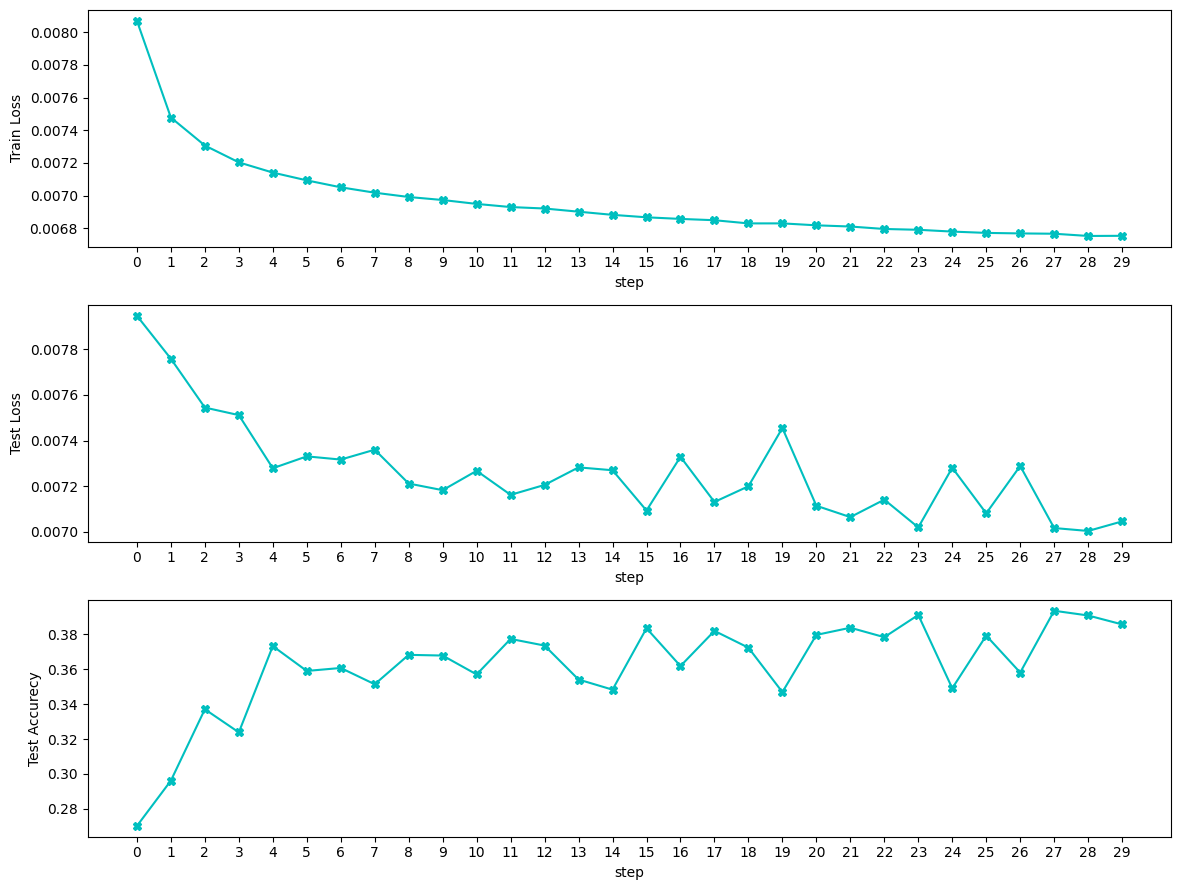

Epoch = 30, Train Loss = 0.00675, Test Loss = 0.00705, Test acc = 0.3855


In [ ]:
model = LinearClassifier(x_train.shape[1], len(labels))
model.train(x_train, y_train, x_test, y_test)

## Формат результата

* Значение accuracy для test части датасета >0.35.
* График разделяющей кривой для train части датасета.

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX02/result_3_task_ex02.png" width="500">

# Задание 4. Написание sklearn-совместимой модели

В этом задании мы наследуемся от написанного нами класса `LinearClassifier` и базовых классов `sklearn`, чтобы сделать `sklearn`-совместимую модель.

Подсказка: о списке обязательных параметров и атрибутов для `sklearn` совместимой модели можно почитать [тут](https://scikit-learn.org/stable/developers/develop.html#estimators).

Для экономии времени мы будем использовать датасет рукописных цифр MNIST.

Импорт необходимых библиотек:

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin

Загрузка данных:

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Посмотрим на данные:

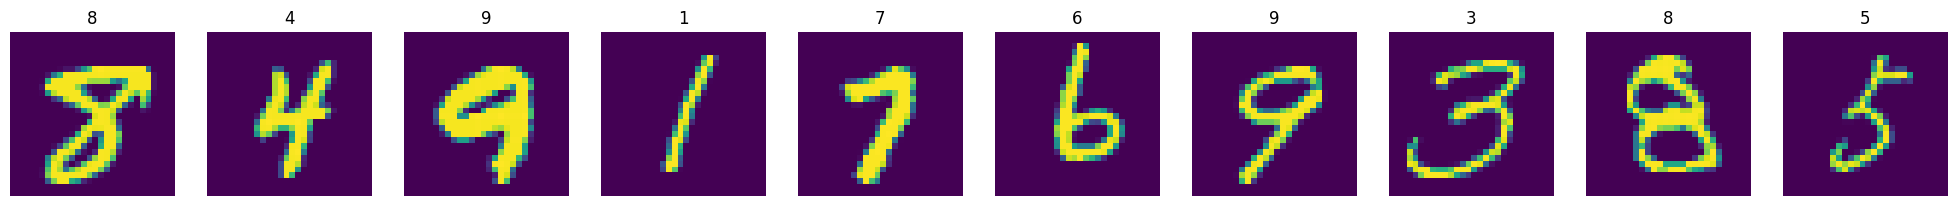

In [ ]:
plt.rcParams["figure.figsize"] = (25, 10)
image_to_display = 10
j = 1
for i in random.sample(range(0, len(x_train)), image_to_display):
    plt.subplot(1, image_to_display, j)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title(int(y_train[i]))
    j += 1

Вытянем данные в вектор:

In [ ]:
# flatten
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(60000, 784)

Напишем класс модели. Наследуемся у:
- [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn-base-baseestimator) — базовый класс всех estimator в sklearn.
- [`ClassifierMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html#sklearn-base-classifiermixin) — определяет метод score как среднюю accuracy.
- Наш класс `LinearClassifier`

Метод `predict` уже определен в классе LinearClassifier, нам необходимо написать `fit`и объявить нужные параметры.

In [ ]:
class SKLinearClassifier(BaseEstimator, ClassifierMixin, LinearClassifier):
    def __init__(
        self,
        input_size=784,
        classes_num=10,
        batch_size=1024,
        lr=2e-7,
        epochs=30,
    ):
        LinearClassifier.__init__(self, input_size, classes_num, batch_size)
        # Your code here
        self.input_size = input_size
        self.classes_num = classes_num
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr
    def fit(self, X, y):
        # Your code here
        self.train(X, y, X, y)
        return self

Проверим работу модели.

In [ ]:
model = SKLinearClassifier()

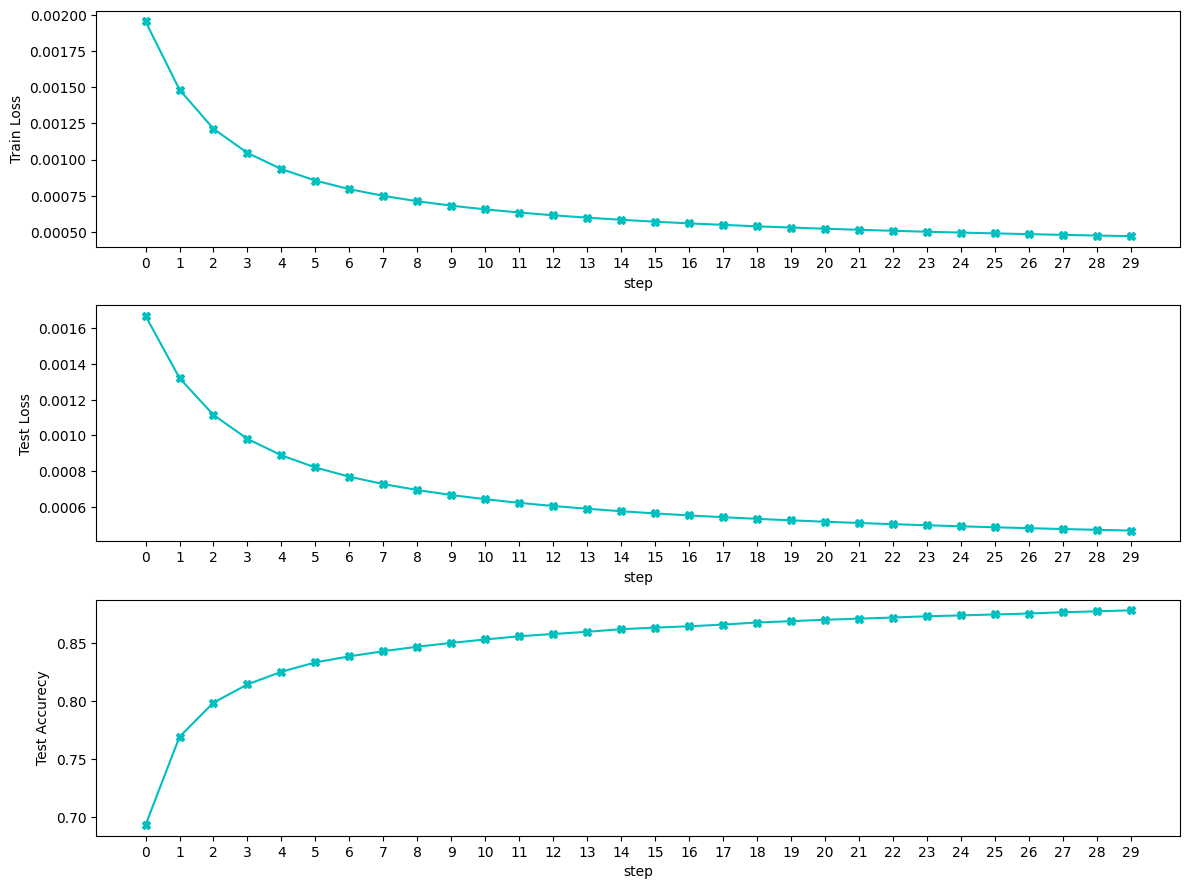

Epoch = 30, Train Loss = 0.00047, Test Loss = 0.00047, Test acc = 0.8784833333333333


SKLinearClassifier()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
df = pd.DataFrame()
df["y_pred"] = y_pred
df["y_true"] = y_test
df.head()

,y_pred,y_true
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


Посмотрим на качество на кросс-валидации

In [ ]:
set_seed()
scores = cross_val_score(model, x_train, y_train, n_jobs=-1, cv=4)
print(f"Accuracy: {scores.mean():.3f}, std: {scores.std():.3f}")

Accuracy: 0.870, std: 0.006


## Формат результата

* `sklearn`-совместимая модель
* Значение accuracy на кросс-валидации >0.85.